<a href="https://colab.research.google.com/github/maggiecrowner/visualization_fork/blob/main/EDA_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA/Visualization Lab - Maggie Crowner

## Question 1

In [79]:
! git clone https://github.com/maggiecrowner/visualization_fork
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fatal: destination path 'visualization_fork' already exists and is not an empty directory.


### Part 1

In [6]:
df = pd.read_csv('/content/visualization/assignment/data/college_completion.csv',low_memory=False)

###Part 2

In [13]:
print(df.shape)
df.head()

(3798, 63)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


There are 3798 observations of 63 variables. The variables include many statistics about various colleges, such as their location, whether they're public/private, their size, and very accolades.

###Part 3

In [14]:
print(pd.crosstab(df['control'],df['level']),'\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 



There are many more 4-year private colleges than 2-year private colleges. There are more 2-year public colleges than 4-year public colleges. Of private colleges that are not-for-profit, almost all of them are 4-year. There are also many more private colleges in this data set in general.

###Part 4

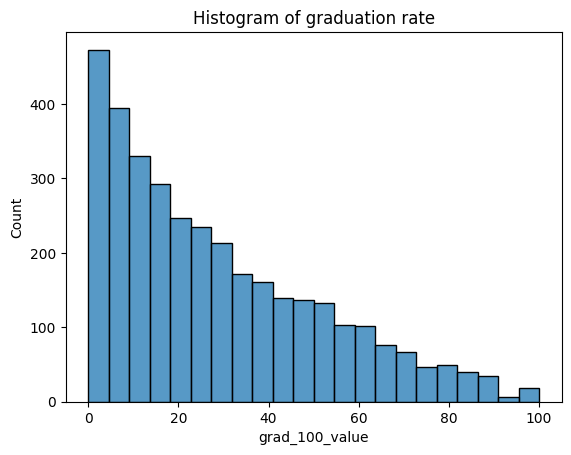

In [31]:
sns.histplot(df['grad_100_value'])
plt.title('Histogram of graduation rate')
plt.show()

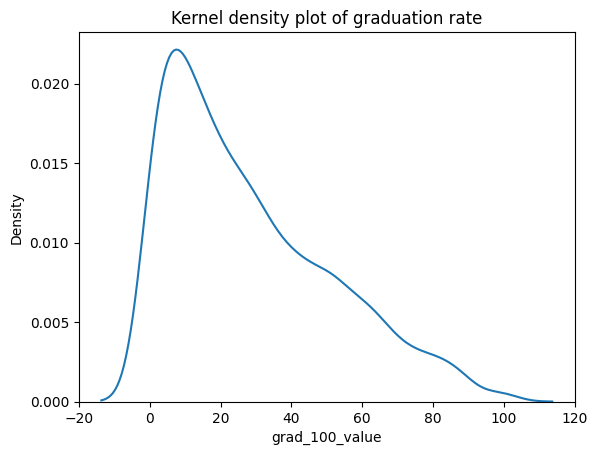

In [30]:
sns.kdeplot(df['grad_100_value'])
plt.title('Kernel density plot of graduation rate')
plt.show()

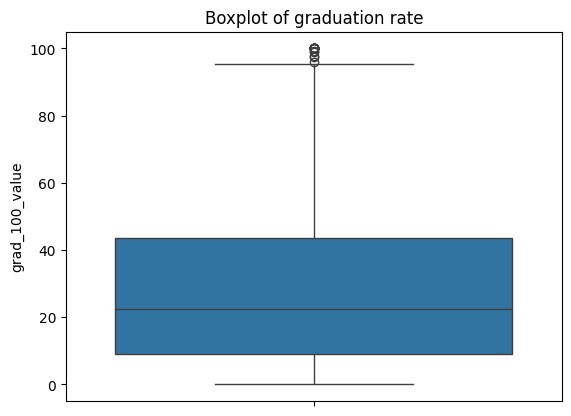

In [29]:
sns.boxplot(df['grad_100_value'])
plt.title('Boxplot of graduation rate')
plt.show()

In [19]:
df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


###Part 5

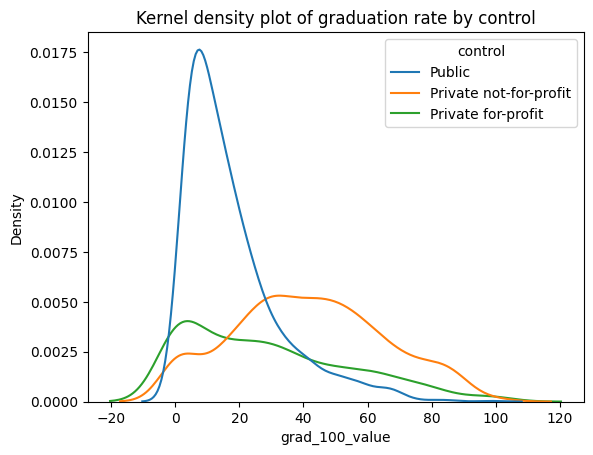

In [32]:
sns.kdeplot(data=df, x='grad_100_value', hue='control')
plt.title('Kernel density plot of graduation rate by control')
plt.show()

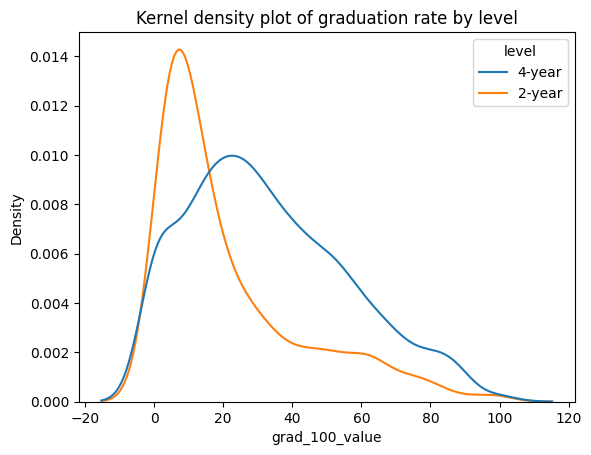

In [33]:
sns.kdeplot(data=df, x='grad_100_value', hue='level')
plt.title('Kernel density plot of graduation rate by level')
plt.show()

In [27]:
df.loc[:, ['control','grad_100_value']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [28]:
df.loc[:, ['level','grad_100_value']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

Public colleges and 2-year colleges each have much less variation in their graduation rates, as you can see in the kernel density plots. However, private colleges and 4-year colleges each have a larger graduation rate on average, with private not-for-profit colleges having the highest mean by far.

###Part 6

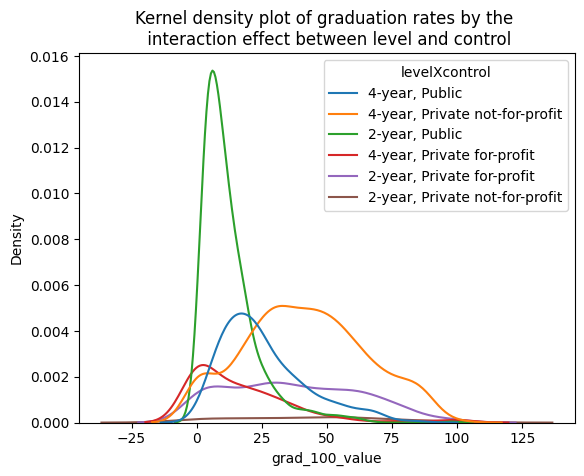

In [37]:
df['levelXcontrol'] = df['level']+', '+df['control']
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol')
plt.title('Kernel density plot of graduation rates by the \n interaction effect between level and control')
plt.show()

4-year, private not-for-profit colleges appear to have the highest graduation rates on average based on the density plot. This makes sense since that control and level both had high averages separately as well. However, 4-year private for-profit colleges appear to have one of the lowest graduation rates, which was newer information that I didn't know without looking at the interaction effect.

###Part 7

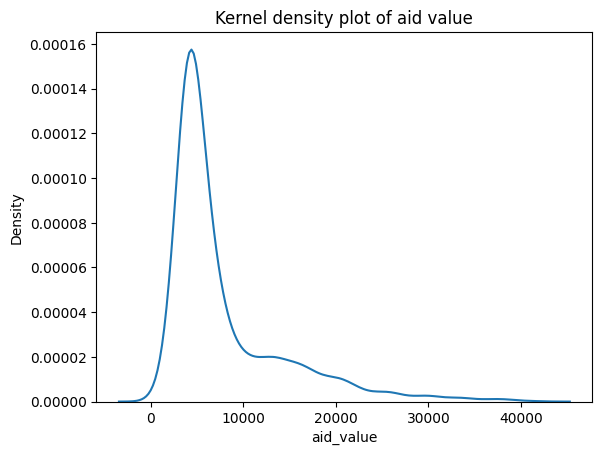

In [39]:
sns.kdeplot(data=df, x='aid_value')
plt.title('Kernel density plot of aid value')
plt.show()

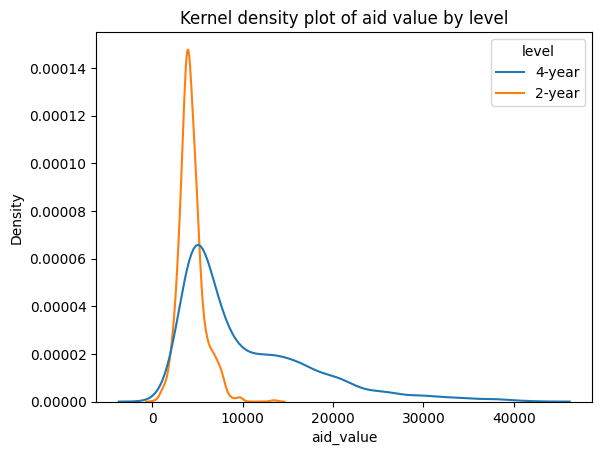

In [41]:
sns.kdeplot(data=df, x='aid_value', hue='level')
plt.title('Kernel density plot of aid value by level')
plt.show()

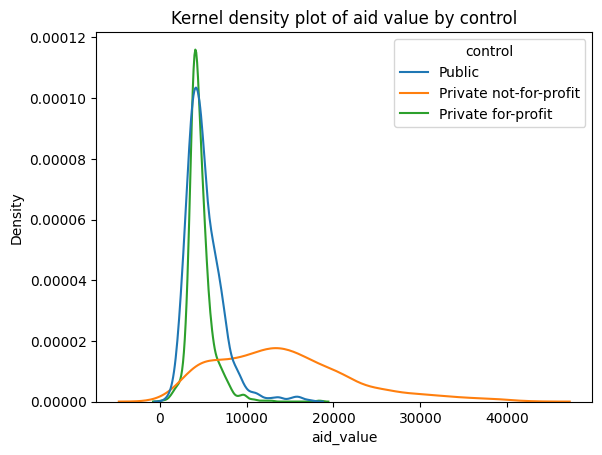

In [40]:
sns.kdeplot(data=df, x='aid_value', hue='control')
plt.title('Kernel density plot of aid value by control')
plt.show()

The shape of the graph is a little bit right-skewed. This makes sense once we separate the graph by level and by control. In the density plot by control, you can see the private not-for-profit aid values being way higher than the other types of colleges, which would explain that right skew in the overall data. 4-year colleges also have a little bit of effect on the right skew of the overall density plot, but it can be mainly attributed to the private not-for-profit colleges.

In [43]:
df.loc[:, ['level','aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [42]:
df.loc[:, ['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

###Part 8

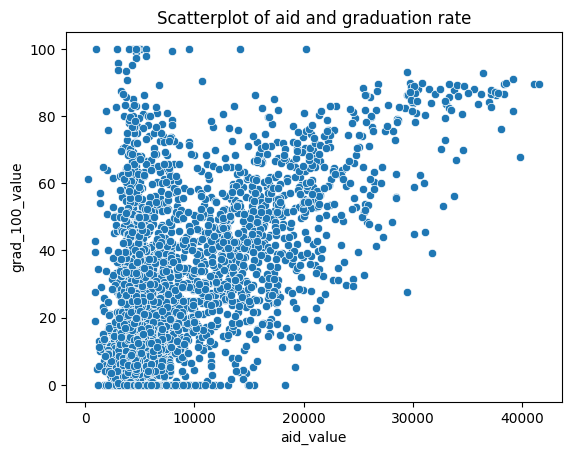

In [45]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value')
plt.title('Scatterplot of aid and graduation rate')
plt.show()

There appears to be a slightly positive relationship between aid value and graduation rates, although it is not a very strong correlation.

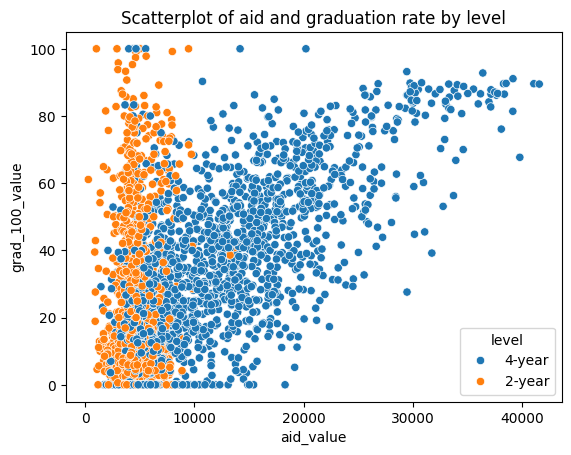

In [46]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level')
plt.title('Scatterplot of aid and graduation rate by level')
plt.show()

Now we can see that the positive correlation we saw earlier is really only applicable to 4-year colleges. 2-year colleges seem to have similar aid values no matter what graduation rates they have.

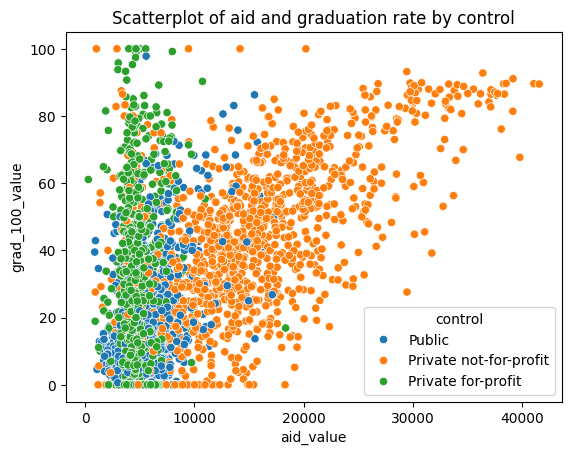

In [47]:
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control')
plt.title('Scatterplot of aid and graduation rate by control')
plt.show()

It appears that private for-profit colleges also have similar aid values no matter the graduation rate. Public colleges have a very slight positive relationship, but it only makes up a tiny fraction of the overall relationship we saw, as public colleges do not ever have very high aid values. Private not-for-profit colleges seem to have a much stronger correlation between graduation rate and aid values.

##Question 4

###Part 1

In [60]:
import urllib.request
import json

url = 'https://data.cms.gov/data-api/v1/dataset/d7fabe1e-d19b-4333-9eff-e80e0643f2fd/data'
apikey = '?api_key=XrJLlHyRab7B5oW072HQhB24H75fafJZ5MdIFlje'
response = urllib.request.urlopen(url+apikey)
response_bytes = response.read()
data = json.loads(response_bytes)
response.close()

df = pd.DataFrame(data)
display(df)

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES,B_ORGNL_MDCR_BENES,B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47959444,33147099,14812345,35679758,22661451,13018307,10000861,1030113,409204,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477,711448,210029,...,862992,652965,210026,637247,437749,199498,205496,32790,11452,387510
2,2013,Year,County,AL,Alabama,Autauga County,01001,9323,6484,2840,...,8742,5902,2840,6036,3268,2767,1839,296,105,3796
3,2013,Year,County,AL,Alabama,Baldwin County,01003,41033,28775,12258,...,38651,26393,12258,27352,15593,11759,5276,867,379,20830
4,2013,Year,County,AL,Alabama,Barbour County,01005,5847,5036,810,...,5515,4704,810,4170,3410,759,1783,304,73,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2013,Year,County,KS,Kansas,Phillips County,20147,1357,1333,25,...,1287,1262,25,919,899,20,147,35,13,724
996,2013,Year,County,KS,Kansas,Pottawatomie County,20149,3310,3025,285,...,3046,2761,285,2094,1852,242,408,52,26,1609
997,2013,Year,County,KS,Kansas,Pratt County,20151,1944,1894,49,...,1848,1799,49,1424,1381,43,244,38,22,1121
998,2013,Year,County,KS,Kansas,Rawlins County,20153,702,683,19,...,679,661,19,461,449,12,70,*,*,372


###Part 2

The data dictionary provided on the website includes descriptions of what each variable refers to and if it is a text variable or a numeric variable. It is a very clean data dictionary and there is nothing that is confusing in it. However, it does not provide a lot of details. At first glance, it appears that missing values are coded as '*', but it says nothing about this in the data dictionary. This data set is mostly numeric or identification variables, so the only categorical variables are things such as month and county. These categories are not listed in the data dictionary, but I do think they are pretty self-explanatory and so I don't think this is a huge problem. However, the missing data not being described is one problem I have with the data dictionary.

###Part 3

The variables I have selected are:


*   BENE_GEO_LVL - Geography level that data has been aggregated for (national, state, county). I would like to subset this data set to just look at the data per state, so it is consistent across and more manageable than county.
*   TOT_BENES - Total number of Medicare beneficiaries per state. I think this will be interesting to look at the distribution of.
*   AGE_LT_25_BENES - Count of Medicare beneficiaries under the age of 25. This is less common, so it's interesting to look at the statistics for.
*   AGED_NO_ESRD_BENES - Count of Medicare beneficiaries without End Stage Renal Disease. This is interesting to compare to age, since many younger people who get Medicare do so because of ESRD.



In [77]:
# Subsetting data set to only include the aggregates by state.
df = df[df['BENE_GEO_LVL']=='State']

# Converting TOT_BENES variable to integer.
print(df['TOT_BENES'])
df['TOT_BENES'] = df['TOT_BENES'].astype(int)

# Converting AGE_LT_25_BENES variable to integer.
print(df['AGE_LT_25_BENES'])
df['AGE_LT_25_BENES'] = df['AGE_LT_25_BENES'].astype(int)

# Converting AGED_NO_ESRD_BENES variable to integer.
print(df['AGED_NO_ESRD_BENES'])
df['AGED_NO_ESRD_BENES'] = df['AGED_NO_ESRD_BENES'].astype(int)

1       921477
70       76224
101    1050128
118     572713
195    5300177
255     721035
321     608512
331     167686
336      83964
339    3753454
408    1412936
569     229717
576     260086
622    1984102
726    1094334
820     549041
921     465899
Name: TOT_BENES, dtype: int64
1      2717
70      242
101    1803
118    1986
195    9300
255    1143
321    1177
331     329
336     278
339    6439
408    3154
569     311
576     669
622    4560
726    2710
820    1359
921    1256
Name: AGE_LT_25_BENES, dtype: object
1       694586
70       63460
101     894246
118     436922
195    4552799
255     618628
321     524647
331     140510
336      68343
339    3224949
408    1132437
569     204259
576     218558
622    1681357
726     893658
820     472054
921     392625
Name: AGED_NO_ESRD_BENES, dtype: object


###Part 4

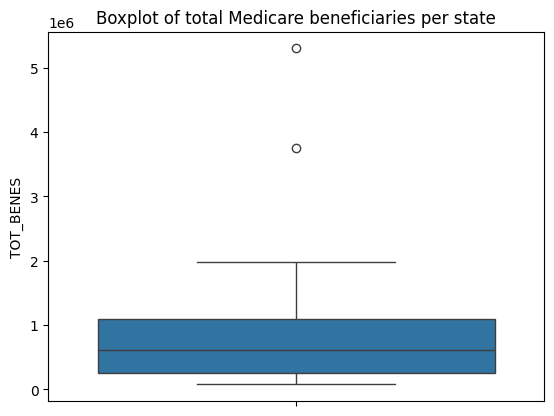

In [80]:
# TOT_BENES
sns.boxplot(df['TOT_BENES'])
plt.title('Boxplot of total Medicare beneficiaries per state')
plt.show()

There are two outliers, which means that two states have far more total beneficiaries than the other states.

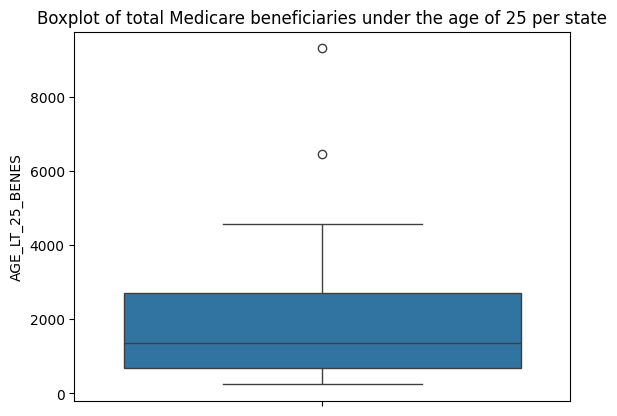

In [81]:
# AGE_LT_25_BENES
sns.boxplot(df['AGE_LT_25_BENES'])
plt.title('Boxplot of total Medicare beneficiaries under the age of 25 per state')
plt.show()

There are also two outliers here. It would be reasonable to assume these are the same two states.

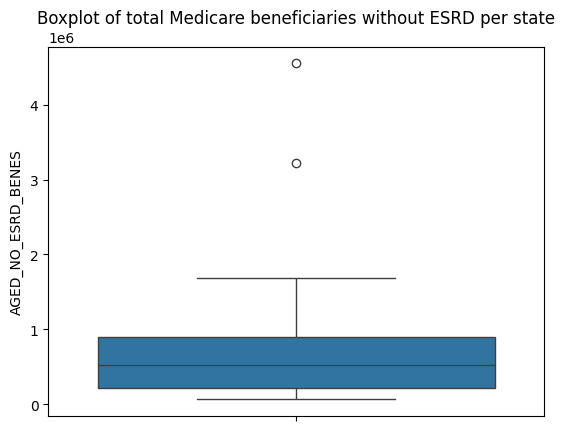

In [82]:
# AGED_NO_ESRD_BENES
sns.boxplot(df['AGED_NO_ESRD_BENES'])
plt.title('Boxplot of total Medicare beneficiaries without ESRD per state')
plt.show()

There are also two outliers here. It would again be reasonable to assume these are the same two states, so I am wondering which states those are.

###Part 5

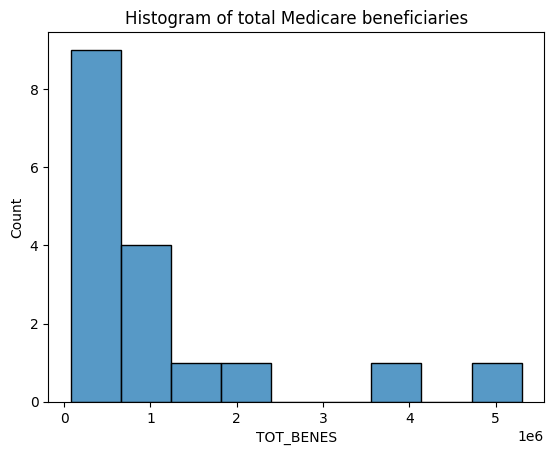

In [86]:
sns.histplot(df['TOT_BENES'])
plt.title('Histogram of total Medicare beneficiaries')
plt.show()

There is definitely a strong right skew in total Medicare beneficiaries. You can also see the two outliers present in the histogram. I don't think anything needs to be rescaled or transformed, unless we wanted to make this variable appropriate for linear regression, which I don't feel is appropriate for this variable anyway. One thing to note is that the x-axis of this histogram is in millions.

###Part 6

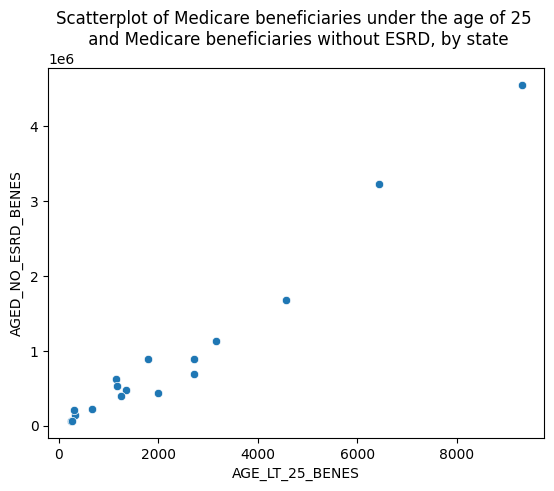

In [88]:
sns.scatterplot(data=df, x='AGE_LT_25_BENES', y='AGED_NO_ESRD_BENES')
plt.title('Scatterplot of Medicare beneficiaries under the age of 25 \n and Medicare beneficiaries without ESRD, by state')
plt.show()

There appears to be a pretty strong positive linear relationship between the number of young Medicare beneficiaries and the number of non-ESRD Medicare beneficiaries per state. This is interesting, but likely is just because some states have large amounts of beneficiaries in every category compared to other states.

###Part 7

In [91]:
df['TOT_BENES'].describe()

,TOT_BENES
count,1.700000e+01
mean,1.132440e+06
std,1.399994e+06
min,7.622400e+04
25%,2.600860e+05
50%,6.085120e+05
75%,1.094334e+06
max,5.300177e+06


The mean number of beneficiaries per state is about 1,132,440. The minimum is 76,224 and the maximum is 5,300,177. I also looked up which of the states were those two outliers I have been discussing, and it is California and Florida, which makes sense because they're huge states.